In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [233]:
df = pd.read_xml("/Users/matthesfogtmann/Desktop/apple_health_export/eksport.xml")[2:]
df2 = pd.read_xml("/Users/matthesfogtmann/Desktop/apple_health_export/export_cda.xml")

In [234]:
# getting values that only appear once and putting them in dictornary and removing column
one_time_counts = {}
for i in df.columns:
    if df[i].value_counts().sum() <= 1:
        one_time_counts.update({i:df[i].unique()[-1]})
        df.drop(i,inplace=True,axis=1)

In [281]:
df["startDate"] = pd.to_datetime(df["startDate"])
df["endDate"] = pd.to_datetime(df["endDate"])

In [235]:
#assigning only device name
def device_finder(x):
    try:
        return x.split(", ")[1][5:]
    except:
        return x

In [236]:
df["device"] = df["device"].apply(device_finder)

In [237]:
#removing text we dont need from values
def HK_remover(x):
    strings_to_replace = ["HKQuantityTypeIdentifier","HKCategoryTypeIdentifier"]
    for i in strings_to_replace:
        try:
            x = x.replace(i,"")
        except:
            pass
    return x

In [238]:
df["type"] = df["type"].apply(HKQuantityTypeIdentifie_remover)

In [239]:
df.drop(["sourceVersion","creationDate"],axis=1,inplace=True)

In [232]:
df.head(5)

,value,type,sourceName,unit,startDate,endDate,device
1,None,None,None,None,None,None,None
2,176,Height,Sundhed,cm,2019-10-19 17:31:56 +0200,2019-10-19 17:31:56 +0200,None
3,179,Height,Sundhed,cm,2021-10-15 17:19:30 +0200,2021-10-15 17:19:30 +0200,None
4,62,BodyMass,Sundhed,kg,2019-10-19 17:31:56 +0200,2019-10-19 17:31:56 +0200,None
5,75,BodyMass,Sundhed,kg,2021-10-15 17:19:30 +0200,2021-10-15 17:19:30 +0200,None


In [221]:
df["value"].value_counts()

1            8875
2            1721
8            1022
3             889
4             659
             ... 
0.10949         1
0.15535         1
0.0366125       1
0.20976         1
0.4894          1
Name: value, Length: 28802, dtype: int64

In [231]:
for i in df["value"].unique():
    try:
        float(i)
    except:
        print(i)

None
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisAsleep


In [255]:
sleep_df = df[(df["value"]=="HKCategoryValueSleepAnalysisInBed")|(df["value"]=="HKCategoryValueSleepAnalysisAsleep")].copy()

In [266]:
sleep_df.head(3)

,value,type,sourceName,unit,startDate,endDate,device
116800,HKCategoryValueSleepAnalysisInBed,SleepAnalysis,Ur,None,2017-02-28 00:51:44+02:00,2017-02-28 08:25:56+02:00,iPhone
116801,HKCategoryValueSleepAnalysisInBed,SleepAnalysis,Ur,None,2017-12-03 22:58:24+02:00,2017-12-04 07:51:44+02:00,iPhone
116802,HKCategoryValueSleepAnalysisInBed,SleepAnalysis,Ur,None,2017-12-04 07:51:48+02:00,2017-12-04 08:05:08+02:00,iPhone


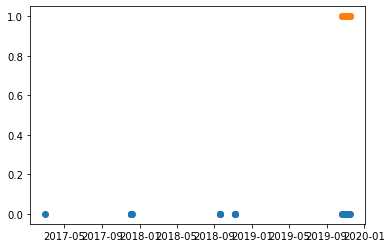

In [264]:
for index,val in enumerate(sleep_df["value"].unique()):
    plt.scatter(x = sleep_df[sleep_df["value"]==val]["startDate"],
                y = [index]*len(sleep_df[sleep_df["value"]==val]))

In [284]:
step_df = df[df["type"]=="StepCount"].copy()

In [285]:
step_df["value"] = pd.to_numeric(step_df["value"])

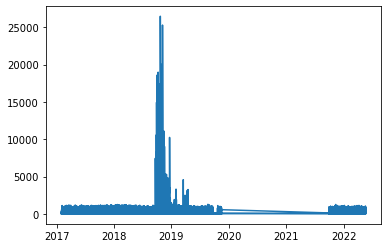

In [291]:
plt.plot(step_df["startDate"],step_df["value"])

In [283]:
step_df["value"] = pd.to_numeric(step_df["value"])

In [330]:
df["type"].unique()

array(['Height', 'BodyMass', 'StepCount', 'DistanceWalkingRunning',
       'FlightsClimbed', 'HeadphoneAudioExposure',
       'WalkingDoubleSupportPercentage', 'WalkingSpeed',
       'WalkingStepLength', 'WalkingAsymmetryPercentage', 'SleepAnalysis'],
      dtype=object)

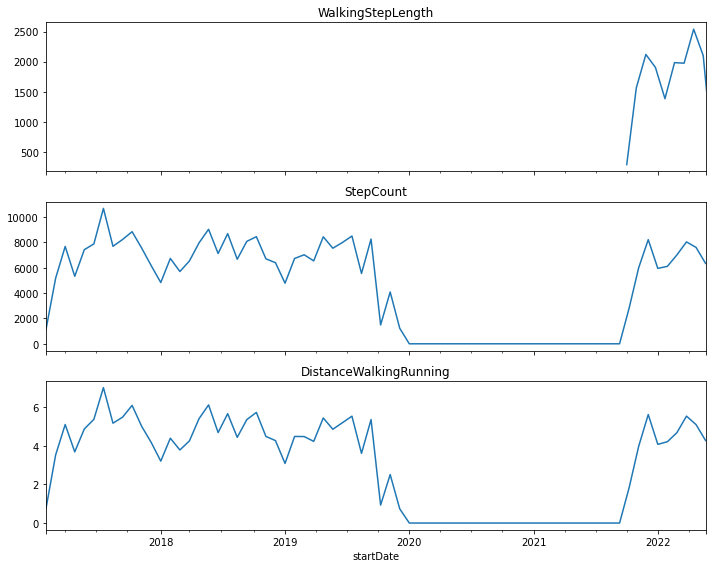

In [336]:
fig, ax = plt.subplots(3,1,figsize=(10,8),sharex=True)
num = 1
for i in ["StepCount","DistanceWalkingRunning"]:
    (df[df["type"]==i].set_index("startDate")["value"].apply(float).groupby(pd.Grouper(freq="4W",)).sum()/28).plot(ax=ax[num])
    ax[num].set_title(i)
    num+=1
    
df[df["type"]==i].set_index("startDate")["value"].apply(float).groupby(pd.Grouper(freq="4W",)).sum()/28).plot(ax=ax[num])
    ax[num].set_title(i)
    
plt.tight_layout()

In [311]:
df["type"].unique()

array(['Height', 'BodyMass', 'StepCount', 'DistanceWalkingRunning',
       'FlightsClimbed', 'HeadphoneAudioExposure',
       'WalkingDoubleSupportPercentage', 'WalkingSpeed',
       'WalkingStepLength', 'WalkingAsymmetryPercentage', 'SleepAnalysis'],
      dtype=object)

<AxesSubplot:xlabel='startDate'>

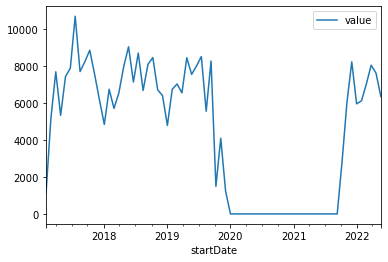

In [305]:


(step_df.set_index("startDate").groupby(pd.Grouper(freq="4W",)).sum()/28).plot()

In [294]:
step_df

,value,type,sourceName,unit,startDate,endDate,device
6,69,StepCount,Matthes,count,2017-02-01 08:46:01+02:00,2017-02-01 08:54:41+02:00,iPhone
7,46,StepCount,Matthes,count,2017-02-01 09:16:56+02:00,2017-02-01 09:26:04+02:00,iPhone
8,195,StepCount,Matthes,count,2017-02-01 09:26:04+02:00,2017-02-01 09:32:22+02:00,iPhone
9,388,StepCount,Matthes,count,2017-02-01 09:38:36+02:00,2017-02-01 09:48:35+02:00,iPhone
10,155,StepCount,Matthes,count,2017-02-01 09:48:35+02:00,2017-02-01 09:50:34+02:00,iPhone
...,...,...,...,...,...,...,...
41833,316,StepCount,iPhone 13 Pro,count,2022-05-20 11:06:11+02:00,2022-05-20 11:09:00+02:00,iPhone
41834,373,StepCount,iPhone 13 Pro,count,2022-05-20 11:27:10+02:00,2022-05-20 11:37:11+02:00,iPhone
41835,802,StepCount,iPhone 13 Pro,count,2022-05-20 11:37:11+02:00,2022-05-20 11:45:53+02:00,iPhone
41836,124,StepCount,iPhone 13 Pro,count,2022-05-20 11:47:22+02:00,2022-05-20 11:49:33+02:00,iPhone
